# Article Consolidation

Consolidates Articles from different CSV Files into a single CSV and standardize the categories to the 6 Identified Categories.

In [1]:
import pandas as pd
import seaborn as sns
import glob
import pickle

## Straits Times

In [2]:
path = r'./website scraping/Straits Times Output/'
all_files = glob.glob(path + "/*.xlsx")

li = []

for filename in all_files:
    df = pd.read_excel(filename, index_col=None, header=0)
    li.append(df)

straitsTimesRaw = pd.concat(li, axis=0, ignore_index=True)

In [3]:
straitsTimesProcessed=straitsTimesRaw
straitsTimesProcessed['category']=straitsTimesProcessed['category'].str.title()

#Identify Premium Articles
straitsTimesProcessed['premium']=straitsTimesProcessed['article'].str.contains(r'Please subscribe or log in to continue reading the full article.')
straitsTimesProcessed[straitsTimesProcessed['premium']==1]

#Drop Premium Articles
straitsTimesProcessed=straitsTimesProcessed[straitsTimesProcessed['premium']!=1]
straitsTimesProcessed['source']='The Straits Times'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [4]:
straitsTimesProcessed.tail()

,Unnamed: 0,link,title,topics,category,sub_category,author,date,article,premium,source
3422,0,https://www.straitstimes.com/tech/tablets/good...,Good balance of price and performance,"TECH REVIEW,APPLE,IPAD",Tech,tablets,TREVOR TAN,"PublishedApr 10, 2019, 5:00 am SGT",\nThe longest holdout in Apple's iPad family -...,False,The Straits Times
3423,0,https://www.straitstimes.com/tech/tablets/tech...,Tech review: Brydge Pro 12.9 turns your iPad P...,"TECH REVIEW,IPAD,APPLE",Tech,tablets,TREVOR TAN,"PublishedAug 27, 2019, 5:30 pm SGT",\nThe Brydge Pro 12.9 is a Bluetooth keyboard ...,False,The Straits Times
3424,0,https://www.straitstimes.com/tech/games-apps/y...,YouTube builds new website for children after ...,"YOUTUBE,CHILDREN AND YOUTH",Tech,games-apps,-,"PublishedAug 29, 2019, 3:34 am SGT",\nNEW YORK (BLOOMBERG) - YouTube said it will ...,False,The Straits Times
3426,0,https://www.straitstimes.com/world/united-stat...,YouTube to pay US$170m over alleged illegal co...,"US NEWS,YOUTUBE",World,united-states,-,"PublishedSep 4, 2019, 11:32 pm SGT",\nWASHINGTON (DPA) - YouTube has been ordered ...,False,The Straits Times
3427,0,https://www.straitstimes.com/tech/games-apps/r...,Razer's Viper mouse lean and agile,"TECH REVIEW,RAZER,GAMING/VIDEO GAMES",Tech,games-apps,VINCENT CHANG,"PublishedAug 7, 2019, 5:00 am SGT",\nAs a middle-aged gamer who needs every bit o...,False,The Straits Times


## AsiaOne

In [5]:
path = r'./website scraping/AsiaOne Output/'
all_files = glob.glob(path + "/*.xlsx")

li = []

for filename in all_files:
    df = pd.read_excel(filename, index_col=None, header=0)
    li.append(df)

asiaOneRaw = pd.concat(li, axis=0, ignore_index=True)

In [6]:
asiaOneProcessed=asiaOneRaw
asiaOneProcessed['source']='AsiaOne'
asiaOneProcessed['category']=asiaOneProcessed['category'].str.title()
asiaOneProcessed.head()

,Unnamed: 0,link,title,topics,category,sub_category,author,date,article,source
0,0,http://www.asiaone.com/singapore/ntu-investiga...,NTU investigating inappropriate student behavi...,"NTU (Nanyang Technological University), Sexual...",Singapore,NaN,Cheryl Teh,"Aug 15, 2019",The Nanyang Technological University (NTU) is ...,AsiaOne
1,0,http://www.asiaone.com/digital/identity-crisis...,Identity crisis: Chronicling the (mis)adventur...,"Digital, meme",Digital,NaN,Ilyas Sholihyn,"Aug 15, 2019",Batman Bin Suparman. The name that any heroic ...,AsiaOne
2,0,http://www.asiaone.com/singapore/female-scdf-o...,Female SCDF officer's sex videos leaked online,"Singapore courts, crime",Singapore,NaN,David Sun,"Aug 15, 2019",The police are investigating a series of sex v...,AsiaOne
3,0,http://www.asiaone.com/singapore/batman-suparm...,Batman Suparman slashed by Foodpanda colleague...,"Singapore courts, crime",Singapore,NaN,David Sun,"Aug 15, 2019",An argument in a WhatsApp group chat led to a ...,AsiaOne
4,0,http://www.asiaone.com/singapore/missing-singa...,Missing Singaporean kayakers: Fishermen find b...,"malaysia, Rescue, Missing",Singapore,NaN,Kok Yufeng,"Aug 15, 2019",The body of a woman wearing a life jacket was ...,AsiaOne


## Channel News Asia

## Initial 

In [7]:
#Specify Folder Path
folderDirectory = r'./articles/william2/'
all_files = glob.glob(folderDirectory + "/*.csv")

In [8]:
#Combine multiple reports into a single data frame
file_list = []

for filename in all_files:
    if '-final' in filename:
        file_list.append(filename)
        print(filename)

./articles/william2\Asia-final.csv
./articles/william2\Business-final.csv
./articles/william2\Singapore-final.csv
./articles/william2\Sport-final.csv
./articles/william2\World-final.csv


In [9]:
li = []

for file in file_list:
    df = pd.read_csv(file, index_col=None, header=None)
    li.append(df)
    df['File']=file
    df['File']=df['File'].str.split('\\').str[1]

cnaRawData1 = pd.concat(li, axis=0, ignore_index=True)

In [10]:
cnaProcessed1=cnaRawData1
cnaProcessed1.rename(columns={1:'link'}, inplace=True)

In [11]:
def get_text(filename): 
    try:
        article_text = pd.read_csv("./articles/william2/"+filename, header=None,delimiter="\t",engine="python",error_bad_lines=False)
        text =', '.join(article_text[0])
        return text
        
    except:
        print('Unable to parse',filename)

In [12]:
cnaProcessed1["article"] = cnaProcessed1.apply(lambda x: get_text(x["link"]), axis=1)

Skipping line 7: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected aft

Skipping line 2: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 29: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 2: '	' expecte

Skipping line 7: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 27: '	' expected after '"'
Skipping line 37: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 4: '	' expec

Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 12: unexpected end of data
Skipping line 9: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 21: '	' expec

Skipping line 4: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 24: '	' expected after '"'
Skipping line 32: '	' expected after '"'
Skipping line 38: '	' expected after '"'
Skipping line 39: '	' expected after '"'
Skipping line 41: '	' expected after '"'
Skipping line 44: '	' expected after '"'
Skipping line 48: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 26: '	' exp

Skipping line 10: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 24: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 11: '	' expe

Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 24: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 8: '	' expe

Skipping line 12: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 86: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 11: unexpected end of data
Skipping line 3: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 28: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 10: '	' expec

Skipping line 8: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 15: unexpected end of data
Skipping line 3: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expect

Skipping line 3: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 4: '	' expecte

Skipping line 8: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 24: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 27: '	' expected after '"'
Skipping line 37: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 27: '	' ex

Skipping line 3: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 24: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 15: '	' expected 

Skipping line 2: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 12: '	' expecte

Skipping line 6: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 9: '	' expect

Skipping line 7: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 24: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 14: '	' expected a

Skipping line 8: unexpected end of data
Skipping line 11: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 24: '	' expected after '"'
Skipping line 29: '	' expected after '"'
Skipping line 32: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 6: unexpected end of data
Skipping line 16: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 11: '	' expec

Skipping line 13: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 27: '	' expected after '"'
Skipping line 29: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 22: '	' expec

Skipping line 10: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 27: '	' expected after '"'
Skipping line 29: '	' expected after '"'
Skipping line 31: '	' expected after '"'
Skipping line 32: '	' expected after '"'
Skipping line 35: '	' expected after '"'
Skipping line 37: '	' expected after '"'
Skipping line 39: '	' expected after '"'
Skipping line 40: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 28: '	' expected after '"'
Skipping line 31: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 6: '	' ex

Skipping line 5: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 22: '	' expe

Skipping line 9: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 8: unexpected end of data
Skipping line 14: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 31: '	' expected after '"'
Skipping line 33: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expecte

Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 7: '	' expect

Skipping line 8: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: unexpected end of data
Skipping line 8: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 28: '	' expected after '"'
Skipping line 35: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 28: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 34: '	' expected after '"'
Skipping line 35: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expected

Skipping line 22: '	' expected after '"'
Skipping line 28: '	' expected after '"'
Skipping line 29: '	' expected after '"'
Skipping line 32: '	' expected after '"'
Skipping line 33: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 17: unexpected end of data
Skipping line 12: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 15: unexpected end of data
Skipping line 3: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 11: '	' ex

Skipping line 11: unexpected end of data
Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 28: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 27: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 16: '	

Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 32: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected a

Skipping line 10: unexpected end of data
Skipping line 5: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 29: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 22: '	'

Skipping line 12: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 10: '	' ex

Skipping line 8: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 4: '	' expected af

Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 3: '	' expected aft

Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 3: '	' expected af

Skipping line 3: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 7: '	' expected a

Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 24: '	' expected

Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 15: '	' expec

Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 24: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 20: '	' ex

Skipping line 6: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 37: '	' expected after '"'
Skipping line 45: '	' expected after '"'
Skipping line 48: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 24: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 34: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 24: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' e

Skipping line 4: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected aft

Skipping line 3: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 24: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 28: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 5: '	' exp

Skipping line 9: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 27: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 7: '	' expe

Skipping line 6: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 24: '	' expect

Skipping line 4: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 13: '	' expected a

Skipping line 14: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 33: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 3: '	' expe

In [13]:
len(cnaRawData1)

6042

In [14]:
cnaRawData1.head()

,0,link,2,3,File,article
0,Thailand set to deliver first batch of medical...,Asia-articles-txt/articles1txt,01 Aug 2019 08:48PM,"Withoon Danwiboon,GPO,cannabis,medical health,...",Asia-final.csv,BANGKOK: Thailand plans to distribute about 10...
1,Taiwan president slams Beijing's solo tourist ban,Asia-articles-txt/articles2txt,01 Aug 2019 08:25PM,"Beijing,Tsai Ing-wen,China,Taiwan,travel,mainl...",Asia-final.csv,TAIPEI: Taiwan's President Tsai Ing-wen on Thu...
2,Hong Kong financial workers stage flash protest,Asia-articles-txt/articles3txt,01 Aug 2019 08:24PM,"Hong Kong,Hong Kong protests,Asia",Asia-final.csv,HONG KONG: Hundreds of financial workers brave...
3,Drug lab raids in Myanmar's meth capital met w...,Asia-articles-txt/articles4txt,01 Aug 2019 08:14PM,"Myanmar,crime,Yangon,Asia",Asia-final.csv,YANGON: Raids on jungle drug labs have been me...
4,India's top court moves politician's rape tria...,Asia-articles-txt/articles5txt,01 Aug 2019 07:46PM,"New Delhi,Supreme Court,news and politics,inti...",Asia-final.csv,NEW DELHI: India's Supreme Court on Thursday (...


## With New Categories

In [15]:
#Specify Folder Path
folderDirectory = r'./website scraping/CNA/'
all_files = glob.glob(folderDirectory + "/*.csv")

In [16]:
#Combine multiple reports into a single data frame
file_list = []

for filename in all_files:
    if '-final' in filename:
        file_list.append(filename)
        print(filename)

./website scraping/CNA\Asia-final.csv
./website scraping/CNA\Business-final.csv
./website scraping/CNA\Lifestyle-final.csv
./website scraping/CNA\Singapore-final.csv
./website scraping/CNA\Sport-final.csv
./website scraping/CNA\Technology-final.csv
./website scraping/CNA\World-final.csv


In [17]:
li = []

for file in file_list:
    df = pd.read_csv(file, index_col=None, header=None,engine = "python")
    li.append(df)
    df['File']=file
    df['File']=df['File'].str.split('\\').str[1]

cnaRawData2 = pd.concat(li, axis=0, ignore_index=True)

In [18]:
cnaProcessed2=cnaRawData2
cnaProcessed2.rename(columns={1:'link'}, inplace=True)

In [19]:
def get_text2(filename): 
    try:
        article_text = pd.read_csv("./website scraping/CNA/"+filename, header=None,delimiter="\t",engine="python",error_bad_lines=False)
        text =', '.join(article_text[0])
        return text
        
    except:
        print('Unable to parse',filename)

In [20]:
cnaProcessed2["article"] = cnaProcessed2.apply(lambda x: get_text2(x["link"]), axis=1)

Skipping line 4: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 27: '	' expected after '"'
Skipping line 28: '	' expected after '"'
Skipping line 34: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 7: '	' expe

Skipping line 5: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 4: '	' expe

Skipping line 4: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 24: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 28: '	' expected after '"'
Skipping line 29: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected

Skipping line 3: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 6: '	' expected

Skipping line 5: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 27: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 27: '	' expected after '"'
Skipping line 3: '	' expe

Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 29: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 24: '	' expected after '"'
Skipping line 4: '	' expected

Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 16: '	' expected a

Skipping line 2: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 28: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 27: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expected

Skipping line 4: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 11: unexpected end of data
Skipping line 5: '	' expected after '"'
Skipping line 8: '	' expected

Skipping line 5: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 5: '	' expecte

Skipping line 3: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 24: '	' expecte

Skipping line 8: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 31: '	' expected after '"'
Skipping line 35: '	' expected after '"'
Skipping line 38: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 24: '	' expected after '"'
Skipping line 29: '	' expected after '"'
Skipping line 30: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 27: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 11: '	' expec

Skipping line 9: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after

Skipping line 4: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 32: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 25: '	' expecte

Skipping line 16: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 6: '	' expecte

Skipping line 3: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 17: unexpected end of data
Skipping line 19: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 22: '	' expect

Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 22: unexpected end of data
Skipping line 2: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 27: '	' expected a

Skipping line 3: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 32: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 20: unexpected end of data
Skipping line 10: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 11: unexpected end of data
Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 8: '	' expected

Skipping line 10: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 24: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 29: '	' expected after '"'
Skipping line 31: '	' expected after '"'
Skipping line 36: '	' ex

Skipping line 4: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 31: '	' expected after '"'
Skipping line 35: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 19: '	' 

Skipping line 6: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 24: '	' expected after '"'
Skipping line 28: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 28: '	' expected

Skipping line 7: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 8: unexpected end of data
Skipping line 6: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 32: '	' expected after '"'
Skipping line 33: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 15: '	' expected 

Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 13: unexpected end of data
Skipping line 16: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 28: '	' expected after '"'
Skipping line 31: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 9: '	' expe

Skipping line 9: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 31: '	' expected after '"'
Skipping line 36: '	' expected after '"'
Skipping line 38: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 29: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 29: '	' expected after '"'
Skipping line 31: '	' expected after '"'
Skipping line 34: 

Skipping line 16: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 24: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 24: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 16: unexpected end of data
Skipping line 7: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 7: '	' exp

Skipping line 6: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 30: '	' expected after '"'
Skipping line 32: '	' expected after '"'
Skipping line 34: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 4: '	' expec

Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 24: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 11: '	' expecte

Skipping line 3: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected afte

Skipping line 3: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 4: '	' expected af

Skipping line 2: unexpected end of data
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 9: '	' expected af

Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 14: '	' expected afte

Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 19: '	' expected aft

Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected 

Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 27: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 30: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 12: '	' exp

Skipping line 6: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 4: '	' expected a

Skipping line 21: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 21: unexpected end of data
Skipping line 7: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 20: '	' expe

Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 18: '	' expec

Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 24: '	' exp

Skipping line 7: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 37: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 16: '	' expected 

Skipping line 5: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 31: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 13: '	' expected

Skipping line 5: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expect

Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 28: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 2: '	' expected

Skipping line 3: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 24: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 4: '	' expected a

Skipping line 3: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 3: '	' expected

Skipping line 7: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 4: '	' expected 

Skipping line 5: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 27: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 5: '	' expected 

Skipping line 9: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 29: '	' expected after '"'
Skipping line 34: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 14: '	' expected

In [21]:
len(cnaProcessed2)

7373

## Merge CNA Datasets

In [22]:
cna_sources = [cnaProcessed1, cnaProcessed2]
cnaRawData = pd.concat(cna_sources)
cnaRawData.head()

,0,link,2,3,File,article
0,Thailand set to deliver first batch of medical...,Asia-articles-txt/articles1txt,01 Aug 2019 08:48PM,"Withoon Danwiboon,GPO,cannabis,medical health,...",Asia-final.csv,BANGKOK: Thailand plans to distribute about 10...
1,Taiwan president slams Beijing's solo tourist ban,Asia-articles-txt/articles2txt,01 Aug 2019 08:25PM,"Beijing,Tsai Ing-wen,China,Taiwan,travel,mainl...",Asia-final.csv,TAIPEI: Taiwan's President Tsai Ing-wen on Thu...
2,Hong Kong financial workers stage flash protest,Asia-articles-txt/articles3txt,01 Aug 2019 08:24PM,"Hong Kong,Hong Kong protests,Asia",Asia-final.csv,HONG KONG: Hundreds of financial workers brave...
3,Drug lab raids in Myanmar's meth capital met w...,Asia-articles-txt/articles4txt,01 Aug 2019 08:14PM,"Myanmar,crime,Yangon,Asia",Asia-final.csv,YANGON: Raids on jungle drug labs have been me...
4,India's top court moves politician's rape tria...,Asia-articles-txt/articles5txt,01 Aug 2019 07:46PM,"New Delhi,Supreme Court,news and politics,inti...",Asia-final.csv,NEW DELHI: India's Supreme Court on Thursday (...


In [23]:
cnaRawData['File'].unique()

array(['Asia-final.csv', 'Business-final.csv', 'Singapore-final.csv',
       'Sport-final.csv', 'World-final.csv', 'Lifestyle-final.csv',
       'Technology-final.csv'], dtype=object)

In [24]:
len(cnaRawData)

13415

In [25]:
cnaProcessed=cnaRawData
cnaProcessed=cnaProcessed[pd.notnull(cnaProcessed['article'])]
cnaProcessed['source']='Channel News Asia'
cnaProcessed['category']=cnaProcessed['File'].str.split('-').str[0]
cnaProcessed.head()

,0,link,2,3,File,article,source,category
0,Thailand set to deliver first batch of medical...,Asia-articles-txt/articles1txt,01 Aug 2019 08:48PM,"Withoon Danwiboon,GPO,cannabis,medical health,...",Asia-final.csv,BANGKOK: Thailand plans to distribute about 10...,Channel News Asia,Asia
1,Taiwan president slams Beijing's solo tourist ban,Asia-articles-txt/articles2txt,01 Aug 2019 08:25PM,"Beijing,Tsai Ing-wen,China,Taiwan,travel,mainl...",Asia-final.csv,TAIPEI: Taiwan's President Tsai Ing-wen on Thu...,Channel News Asia,Asia
2,Hong Kong financial workers stage flash protest,Asia-articles-txt/articles3txt,01 Aug 2019 08:24PM,"Hong Kong,Hong Kong protests,Asia",Asia-final.csv,HONG KONG: Hundreds of financial workers brave...,Channel News Asia,Asia
3,Drug lab raids in Myanmar's meth capital met w...,Asia-articles-txt/articles4txt,01 Aug 2019 08:14PM,"Myanmar,crime,Yangon,Asia",Asia-final.csv,YANGON: Raids on jungle drug labs have been me...,Channel News Asia,Asia
4,India's top court moves politician's rape tria...,Asia-articles-txt/articles5txt,01 Aug 2019 07:46PM,"New Delhi,Supreme Court,news and politics,inti...",Asia-final.csv,NEW DELHI: India's Supreme Court on Thursday (...,Channel News Asia,Asia


In [26]:
cnaProcessed['category'].unique()

array(['Asia', 'Business', 'Singapore', 'Sport', 'World', 'Lifestyle',
       'Technology'], dtype=object)

## The New Paper

In [27]:
path = r'./website scraping/The New Paper Output/'
all_files = glob.glob(path + "/*.xlsx")

li = []

for filename in all_files:
    df = pd.read_excel(filename, index_col=None, header=0)
    li.append(df)

theNewPaperRaw = pd.concat(li, axis=0, ignore_index=True)

In [28]:
theNewPaperProcessed=theNewPaperRaw
theNewPaperProcessed['category']=theNewPaperProcessed['category'].str.title()
theNewPaperProcessed['sub_category']=theNewPaperProcessed['sub_category'].str.title()
theNewPaperProcessed['source']='The New Paper'
theNewPaperProcessed.head()

,Unnamed: 0,link,title,category,sub_category,author,date,article,source
0,0,https://www.tnp.sg/news/singapore/serial-stalk...,Serial stalker jailed for harassing woman,News,Singapore,Kok Yufeng,"Sep 13, 2019 06:00 am",\nHe was jailed and fined in 2013 for terroris...,The New Paper
1,0,https://www.tnp.sg/news/singapore/unnatural-de...,Unnatural death in Chinatown: Police investiga...,News,Singapore,-,"Sep 13, 2019 06:00 am",\nIn what could potentially be a gruesome disc...,The New Paper
2,0,https://www.tnp.sg/news/singapore/maid-jailed-...,Maid jailed for abusing terminally ill elderly...,News,Singapore,Kok Yufeng,"Sep 13, 2019 06:00 am",\nMyanmar national Lain Ngain was entrusted to...,The New Paper
3,0,https://www.tnp.sg/news/singapore/singaporean-...,Singaporean researcher confirmed killed in US ...,News,Singapore,Tatiana Mohamad Rosli,"Sep 13, 2019 06:00 am",\nThe family of Singaporean researcher Sunil S...,The New Paper
4,0,https://www.tnp.sg/news/world/mid-autumn-festi...,Mid-Autumn Festival lantern protests to light ...,News,World,-,"Sep 13, 2019 06:00 am",\nHONG KONG: Hong Kong activists will combine ...,The New Paper


# Number of Articles

In [29]:
print('Straits Times:',len(straitsTimesProcessed))
print('Asia One:',len(asiaOneProcessed))
print('Channel News Asia:',len(cnaProcessed))
print('The New Paper:',len(theNewPaperProcessed))

Straits Times: 2424
Asia One: 1842
Channel News Asia: 13415
The New Paper: 2742


# Data Exploration

## Categories & Sub Categories

### The Straits Times 

Text(0.5, 1.0, 'The Straits Times Categories')

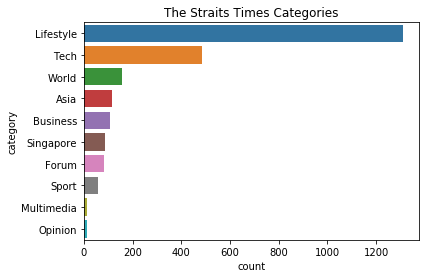

In [30]:
sns.countplot(y='category',data=straitsTimesProcessed,order=straitsTimesProcessed['category'].value_counts().iloc[:10].index).set_title("The Straits Times Categories") 

Text(0.5, 1.0, 'The Straits Times Sub Categories')

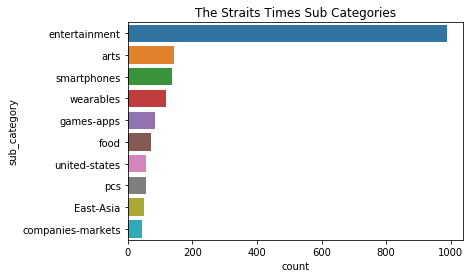

In [31]:
sns.countplot(y='sub_category',data=straitsTimesProcessed,order=straitsTimesProcessed['sub_category'].value_counts().iloc[:10].index).set_title("The Straits Times Sub Categories") 

### Asia One

Text(0.5, 1.0, 'Asia One Categories')

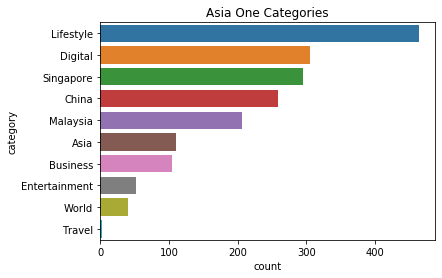

In [32]:
sns.countplot(y='category',data=asiaOneProcessed,order=asiaOneProcessed['category'].value_counts().iloc[:10].index).set_title("Asia One Categories") 

### Channel News Asia

Text(0.5, 1.0, 'Channel News Asia Categories')

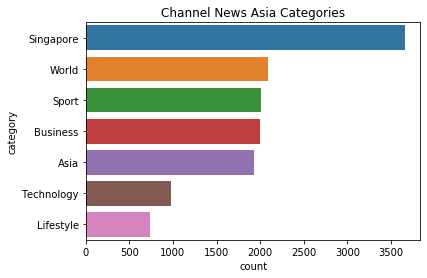

In [33]:
sns.countplot(y='category',data=cnaProcessed,order=cnaProcessed['category'].value_counts().iloc[:10].index).set_title("Channel News Asia Categories") 

### The New Paper

Text(0.5, 1.0, 'The New Paper Categories')

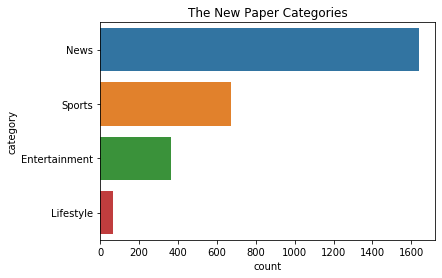

In [34]:
sns.countplot(y='category',data=theNewPaperProcessed,order=theNewPaperProcessed['category'].value_counts().iloc[:10].index).set_title("The New Paper Categories") 

Text(0.5, 1.0, 'The New Paper Sub Categories')

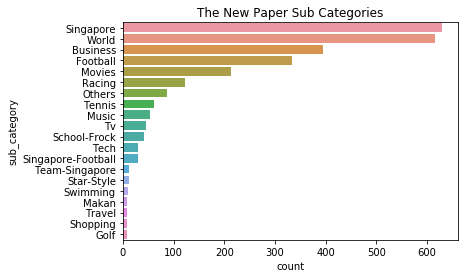

In [35]:
sns.countplot(y='sub_category',data=theNewPaperProcessed,order=theNewPaperProcessed['sub_category'].value_counts().iloc[:20].index).set_title("The New Paper Sub Categories") 

# Classification Categories

6 Main news categories were identified from the Data Exploration across the different news wesbites. The 6 categories identified were: International News, Singapore (Local) News, Business News, Sports, Technology and Lifestyle. In order to align all categories across the 4 different news sites, mapping was performed. 

## Straits Times Mapping

In [36]:
straitsTimesProcessed['category'].unique()

array(['Lifestyle', 'World', 'Asia', 'Tech', 'Business', 'Singapore',
       'Sport', 'Multimedia', 'Opinion', 'Forum', 'Politics'],
      dtype=object)

In [37]:
#Straits Times
straits_times_mapping= {
    'Asia': 'World',
    'China': 'World',
    'Malaysia': 'World',
    'Travel': 'Lifestyle',
    'Tech': 'Technology',
    'Sport': 'Sports',
    'Entertainment': 'Lifestyle'
}

Text(0.5, 1.0, 'Categories')

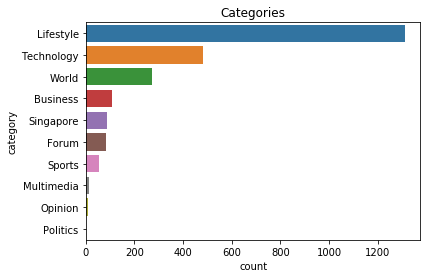

In [38]:
straitsTimesProcessed = straitsTimesProcessed.replace({'category':straits_times_mapping})
sns.countplot(y='category',data=straitsTimesProcessed,order=straitsTimesProcessed['category'].value_counts().iloc[:10].index).set_title("Categories") 

In [39]:
straitsTimesProcessed['category'].unique()

array(['Lifestyle', 'World', 'Technology', 'Business', 'Singapore',
       'Sports', 'Multimedia', 'Opinion', 'Forum', 'Politics'],
      dtype=object)

## Asia One Mapping

In [40]:
asiaOneProcessed['category'].unique()

array(['Singapore', 'Digital', 'Entertainment', 'Lifestyle', 'Malaysia',
       'China', 'Asia', 'World', 'Travel', 'Business', 'Health'],
      dtype=object)

In [41]:
#Asia One
asiaone_mapping= {
    'Asia': 'World',
    'China': 'World',
    'Malaysia': 'World',
    'Travel': 'Lifestyle',
    'Digital': 'Technology',
    'Entertainment': 'Lifestyle'
}

Text(0.5, 1.0, 'Categories')

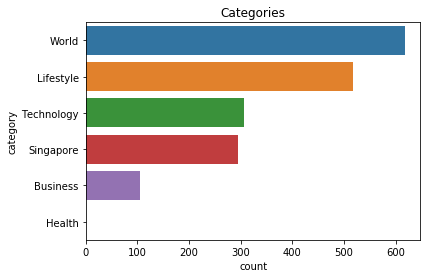

In [42]:
asiaOneProcessed = asiaOneProcessed.replace({'category':asiaone_mapping})
sns.countplot(y='category',data=asiaOneProcessed,order=asiaOneProcessed['category'].value_counts().iloc[:10].index).set_title("Categories") 

In [43]:
asiaOneProcessed['category'].unique()

array(['Singapore', 'Technology', 'Lifestyle', 'World', 'Business',
       'Health'], dtype=object)

## Channel News Asia Mapping

In [44]:
cnaProcessed['category'].unique()

array(['Asia', 'Business', 'Singapore', 'Sport', 'World', 'Lifestyle',
       'Technology'], dtype=object)

In [45]:
#Channel News Asia
channelnewsasia_mapping= {
    'Sport': 'Sports',
    'Asia': 'World'
}

Text(0.5, 1.0, 'Categories')

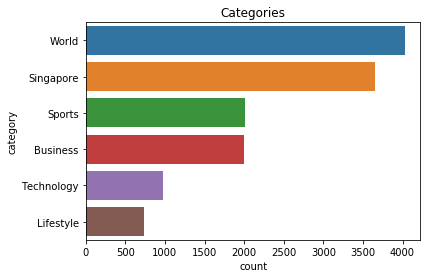

In [46]:
cnaProcessed = cnaProcessed.replace({'category':channelnewsasia_mapping})
sns.countplot(y='category',data=cnaProcessed,order=cnaProcessed['category'].value_counts().iloc[:10].index).set_title("Categories") 

In [47]:
cnaProcessed['category'].unique()

array(['World', 'Business', 'Singapore', 'Sports', 'Lifestyle',
       'Technology'], dtype=object)

## The New Paper Mapping

In [48]:
theNewPaperProcessed['category'].unique()

array(['News', 'Sports', 'Entertainment', 'Lifestyle'], dtype=object)

Text(0.5, 1.0, "The New Paper 'News' Categories")

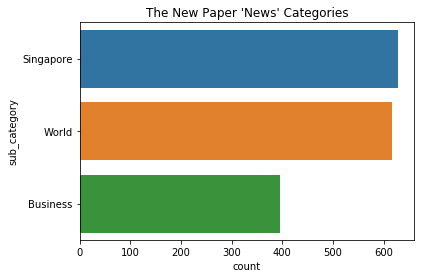

In [49]:
theNewPaper_News = theNewPaperProcessed[theNewPaperProcessed['category']=='News']
sns.countplot(y='sub_category',data=theNewPaper_News,order=theNewPaper_News['sub_category'].value_counts().iloc[:10].index).set_title("The New Paper 'News' Categories") 

In [50]:
def tnp_replace_news_categories(category,sub_category): 
    try:
        if category=='News':
            return sub_category
        else:
            return category
    except:
        print('Error')

In [51]:
theNewPaperProcessed["revised_categories"] = theNewPaperProcessed.apply(lambda x: tnp_replace_news_categories(x["category"],x["sub_category"]), axis=1)

In [52]:
theNewPaperProcessed['revised_categories'].unique()

array(['Singapore', 'World', 'Business', 'Sports', 'Entertainment',
       'Lifestyle'], dtype=object)

In [53]:
#The New Paper
thenewpaper_mapping= {
    'Entertainment': 'Lifestyle'
}

Text(0.5, 1.0, 'Revised Categories')

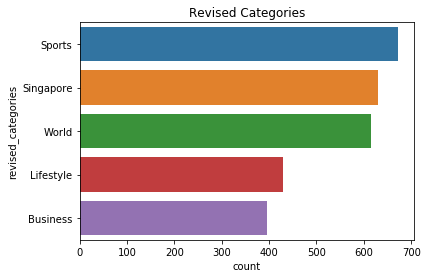

In [54]:
theNewPaperProcessed = theNewPaperProcessed.replace({'revised_categories':thenewpaper_mapping})
sns.countplot(y='revised_categories',data=theNewPaperProcessed,order=theNewPaperProcessed['revised_categories'].value_counts().iloc[:10].index).set_title("Revised Categories") 

In [55]:
theNewPaperProcessed.drop('category', axis=1, inplace=True)
theNewPaperProcessed = theNewPaperProcessed.rename(columns={'revised_categories': 'category'})
theNewPaperProcessed['category'].unique()

array(['Singapore', 'World', 'Business', 'Sports', 'Lifestyle'],
      dtype=object)

# Concatenate all DataFrames

In [56]:
list_of_sources = [straitsTimesProcessed, asiaOneProcessed,cnaProcessed,theNewPaperProcessed]
all_articles = pd.concat(list_of_sources)
all_articles.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Unnamed: 0,article,author,category,date,link,premium,source,sub_category,title,topics,0,2,3,File
1,0.0,\nNEW YORK (AP) - Sales for Margaret Atwood's ...,-,Lifestyle,"PublishedSep 13, 2019, 10:35 am SGT",https://www.straitstimes.com/lifestyle/enterta...,False,The Straits Times,entertainment,"Sales for Handmaid's Tale sequel top 125,000 c...","PUBLISHING,BOOKS",NaN,NaN,NaN,NaN
2,0.0,\nMINNEAPOLIS (AP) - Singer R. Kelly was a no-...,-,Lifestyle,"PublishedSep 13, 2019, 3:46 am SGT",https://www.straitstimes.com/lifestyle/enterta...,False,The Straits Times,entertainment,R. Kelly a no-show in court on Minnesota solic...,"MUSIC,US NEWS,CRIME",NaN,NaN,NaN,NaN
3,0.0,"\nSoul Mate director Derek Tsang, 39, is known...",LOH KENG FATT,Lifestyle,"PublishedSep 12, 2019, 4:50 pm SGT",https://www.straitstimes.com/lifestyle/enterta...,False,The Straits Times,entertainment,HK director Derek Tsang picks forest in Japan ...,"HONG KONG,WEDDINGS AND ENGAGEMENTS",NaN,NaN,NaN,NaN
4,0.0,\nSINGAPORE - The voice behind Spandau Ballet ...,ANJALI RAGURAMAN,Lifestyle,"PublishedSep 12, 2019, 4:28 pm SGT",https://www.straitstimes.com/lifestyle/enterta...,False,The Straits Times,entertainment,"Tony Hadley, ex-frontman of Spandau Ballet, to...","MUSIC,CONCERTS",NaN,NaN,NaN,NaN
6,0.0,\nSINGAPORE - South Korean heart-throb Sung Ho...,JAN LEE,Lifestyle,"PublishedSep 12, 2019, 3:56 pm SGT",https://www.straitstimes.com/lifestyle/enterta...,False,The Straits Times,entertainment,South Korean actor Sung Hoon holding meet-and-...,"STARHUB,ACTORS",NaN,NaN,NaN,NaN


In [57]:
len(all_articles)

20423

In [58]:
all_articles.drop_duplicates(subset='link',keep='last', inplace=True)

In [59]:
len(all_articles)

10995

# Output Data

In [60]:
subset_articles = all_articles[['source','title','article','category']]
subset_articles.head()

,source,title,article,category
1,The Straits Times,"Sales for Handmaid's Tale sequel top 125,000 c...",\nNEW YORK (AP) - Sales for Margaret Atwood's ...,Lifestyle
2,The Straits Times,R. Kelly a no-show in court on Minnesota solic...,\nMINNEAPOLIS (AP) - Singer R. Kelly was a no-...,Lifestyle
3,The Straits Times,HK director Derek Tsang picks forest in Japan ...,"\nSoul Mate director Derek Tsang, 39, is known...",Lifestyle
4,The Straits Times,"Tony Hadley, ex-frontman of Spandau Ballet, to...",\nSINGAPORE - The voice behind Spandau Ballet ...,Lifestyle
6,The Straits Times,South Korean actor Sung Hoon holding meet-and-...,\nSINGAPORE - South Korean heart-throb Sung Ho...,Lifestyle


In [61]:
subset_articles['category'].unique()

array(['Lifestyle', 'World', 'Technology', 'Business', 'Singapore',
       'Sports', 'Multimedia', 'Opinion', 'Forum', 'Politics', 'Health'],
      dtype=object)

In [62]:
len(subset_articles)

10995

## Filter only to articles which fall into the 6 Categories

In [63]:
identified_categories = ['Singapore', 'Sports', 'Lifestyle', 'World', 'Business', 'Technology']

In [64]:
relevant_articles = subset_articles[subset_articles['category'].isin(identified_categories)]
relevant_articles['category'].unique()

array(['Lifestyle', 'World', 'Technology', 'Business', 'Singapore',
       'Sports'], dtype=object)

In [65]:
len(relevant_articles)

10919

In [66]:
#Randomly Shuffle All Rows
relevant_articles=relevant_articles.sample(frac=1)
relevant_articles=relevant_articles.reset_index(drop=True)
relevant_articles.head()

,source,title,article,category
0,Channel News Asia,NaN,CAIRO: Egypt's communications ministry will be...,Business
1,The Straits Times,"China suspends mainland movies, stars from Tai...",\nSHANGHAI/TAIPEI (REUTERS) - China's film reg...,World
2,The Straits Times,Singapore shares open lower on Monday as oil s...,\nSINGAPORE - Singapore shares started the wee...,Business
3,The Straits Times,Ahn Jae-hyun apologises to actress after affai...,\nAhn Jae-hyun has not resorted to tit-for-tat...,Lifestyle
4,The Straits Times,Andy Hui scandal: TVB to lose nearly $2m to re...,\nSINGAPORE - The guilty parties have said sor...,Lifestyle


In [67]:
#Export to Serialized Object
with open('Pickles/all_articles_raw.pickle', 'wb') as output:
    pickle.dump(relevant_articles, output)